## Mini Project III

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

### Tasks

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
demographics = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week4Day2/twm_customer.csv', sep=";", dtype = None)
demographics

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [13]:
demographics = demographics.drop(['cust_id', 'postal_code', 'state_code', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name' , 'city_name'], axis = 1)
demographics

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,M,2
1,6605,71,1,0,M,2
2,18548,38,8,0,F,1
3,47668,54,3,0,F,1
4,44554,59,9,2,F,4
...,...,...,...,...,...,...
742,14795,36,6,1,F,4
743,26387,56,6,1,M,2
744,61300,50,0,2,M,2
745,15100,37,7,0,F,2


In [23]:
demographics['gender']

0      M 
1      M 
2      F 
3      F 
4      F 
       ..
742    F 
743    M 
744    M 
745    F 
746    F 
Name: gender, Length: 747, dtype: object

In [53]:
'''demographics = pd.concat([demographics,pd.get_dummies(demographics['marital_status'], prefix='marital_status')],axis=1)
demographics.drop(['marital_status'], axis = 1, inplace= True)'''

In [54]:
'''demographics = pd.concat([demographics,pd.get_dummies(demographics['gender'], prefix='gender')],axis=1)
demographics.drop(['gender'], axis = 1, inplace= True)'''

In [24]:
# Hot encode gender; 1=Male, 2=Female
demographics['gender'] = demographics['gender'].str.rstrip()
demographics['gender'].replace({
    'M': 0,
    'F': 1,
}, inplace=True)

In [25]:
demographics

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,0,2
1,6605,71,1,0,0,2
2,18548,38,8,0,1,1
3,47668,54,3,0,1,1
4,44554,59,9,2,1,4
...,...,...,...,...,...,...
742,14795,36,6,1,1,4
743,26387,56,6,1,0,2
744,61300,50,0,2,0,2
745,15100,37,7,0,1,2


In [28]:
demographics.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,0.559572,1.882195
std,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000
25%,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000
50%,17242.000000,42.000000,4.000000,0.000000,1.000000,2.000000
75%,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000
max,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000


In [29]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   income           747 non-null    int64
 1   age              747 non-null    int64
 2   years_with_bank  747 non-null    int64
 3   nbr_children     747 non-null    int64
 4   gender           747 non-null    int64
 5   marital_status   747 non-null    int64
dtypes: int64(6)
memory usage: 35.1 KB


In [26]:
demographics.groupby('marital_status').size()

marital_status
1    276
2    353
3     48
4     70
dtype: int64

### Radar and PCA

In [27]:
'''marry = demographics.loc[]
scaler = StandardScaler(fff)
marry_stand = scaler.fit_transform(marry)'''

'marry = demographics.loc[]\nscaler = StandardScaler(fff)\nmarry_stand = scaler.fit_transform(marry)'

In [ ]:
#how to scale hot encoded columns

In [30]:
# standardization
scaler = StandardScaler()
demographics_scaled = scaler.fit_transform(demographics)

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(demographics_scaled)
principalComponents

array([[ 0.4959383 , -0.30146235],
       [-0.00282985, -0.50340016],
       [-1.05331595, -1.20519445],
       ...,
       [ 1.64555365,  1.1139575 ],
       [-0.51080557, -0.79367672],
       [-1.62087518,  0.59773849]])

In [34]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1
0,0.495938,-0.301462
1,-0.002830,-0.503400
2,-1.053316,-1.205194
3,-0.242339,-0.579436
4,2.870593,-0.873124
...,...,...
742,1.215933,0.181926
743,0.731812,-0.845927
744,1.645554,1.113958
745,-0.510806,-0.793677


In [41]:
# fit model with optimal amount of clusters now:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_km = km.fit_predict(principalComponents)

In [42]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

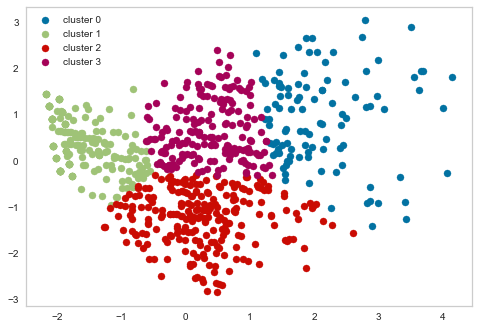

In [56]:
plot_clusters(PCA_components.values, y_km)

In [57]:
minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(demographics)
new_demo = pd.DataFrame(minmax_df, columns=demographics.columns)
new_demo

,income,age,years_with_bank,nbr_children,gender,marital_status
0,0.906997,2.171053,2.777778,1.0,0.0,1.666667
1,0.229091,3.815789,0.555556,0.0,0.0,1.666667
2,0.643326,1.644737,4.444444,0.0,5.0,0.000000
3,1.653336,2.697368,1.666667,0.0,5.0,0.000000
4,1.545329,3.026316,5.000000,2.0,5.0,5.000000
...,...,...,...,...,...,...
742,0.513156,1.513158,3.333333,1.0,5.0,5.000000
743,0.915217,2.828947,3.333333,1.0,0.0,1.666667
744,2.126154,2.434211,0.000000,2.0,0.0,1.666667
745,0.523735,1.578947,3.888889,0.0,5.0,1.666667


In [58]:
new_demo['clusters'] = y_km

In [59]:
cluster_mean = new_demo.groupby('clusters').mean().reset_index()

In [61]:
cluster_names = []
for i in range(len(cluster_mean)):
    cluster_names.append('cluster '+ str(i))

mean_list = []
for cluster in range(len(cluster_mean)):
    mean_list.append(cluster_mean.iloc[cluster, 1:].values.tolist())
col_names = cluster_mean.columns.values[1:].tolist()
col_names

import plotly.graph_objects as go

fig = go.Figure()

for means in range(len(mean_list)):
    fig.add_trace(go.Scatterpolar(
          r=mean_list[means],
          theta=col_names,
          fill='toself',
          name=cluster_names[means]
    ))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 5]
        )),
      showlegend=True
    )

fig.show()